<a href="https://colab.research.google.com/github/sarmiSiva/week_3_assignment/blob/main/week_3_sarmila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/idp_bootcamp/week_3_assignment

/content/drive/MyDrive/idp_bootcamp/week_3_assignment


In [ ]:
!ls

assingment_data  week_3_sarmila.ipynb


In [ ]:
!python3 -m pip install --upgrade pip
!python3 -m pip install paddlepaddle-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [ ]:
!pip install paddleocr

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114250 sha256=1195cd6835be1d3cba79b4ffa1eea22540793e8d6cdbbdf182ae554d0875ca04
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [ ]:
!!pip install premailer

['Collecting premailer',
 '  Downloading premailer-3.10.0-py2.py3-none-any.whl.metadata (15 kB)',
 'Requirement already satisfied: lxml in /usr/local/lib/python3.10/dist-packages (from premailer) (4.9.4)',
 'Collecting cssselect (from premailer)',
 '  Downloading cssselect-1.2.0-py2.py3-none-any.whl.metadata (2.2 kB)',
 'Collecting cssutils (from premailer)',
 '  Downloading cssutils-2.11.1-py3-none-any.whl.metadata (8.7 kB)',
 'Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from premailer) (2.32.3)',
 'Requirement already satisfied: cachetools in /usr/local/lib/python3.10/dist-packages (from premailer) (5.5.0)',
 'Requirement already satisfied: more-itertools in /usr/local/lib/python3.10/dist-packages (from cssutils->premailer) (10.5.0)',
 'Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->premailer) (3.4.0)',
 'Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/

In [ ]:
%pip install transformers
%pip install pillow huggingface_hub
%pip install timm
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.4 MB/s eta 0:00:00


In [ ]:
import os

# Directory where your PNG files are located
directory = '/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data'

png_files = [f for f in os.listdir(directory) if f.endswith('.png')]
png_files.sort()

for index, filename in enumerate(png_files, start=1):
    # Create the new filename with the sequential number
    new_filename = f"{index}.png"

    # Construct full file paths
    old_filepath = os.path.join(directory, filename)
    new_filepath = os.path.join(directory, new_filename)

    # Rename the file
    os.rename(old_filepath, new_filepath)

print("Files have been renamed successfully!")


Files have been renamed successfully!


# Table detection

In [ ]:
from huggingface_hub import hf_hub_download
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch
from PIL import Image

# file_path = hf_hub_download(repo_id="nielsr/example-pdf", repo_type="dataset", filename="1.png")

# file_path = hf_hub_download(repo_id="nielsr/example-pdf", repo_type="dataset", filename="1.png")
# image = Image.open(file_path).convert("RGB")



*1.png unclear table borders*

In [125]:
# Path to the image file in your Google Drive or local directory
#1.png unclear table borders

file_path = "/content/drive/MyDrive/idp_bootcamp/week_3_assignment/assingment_data/2.png"

# Open the image file
image = Image.open(file_path).convert("RGB")

# Display or work with the image
# image


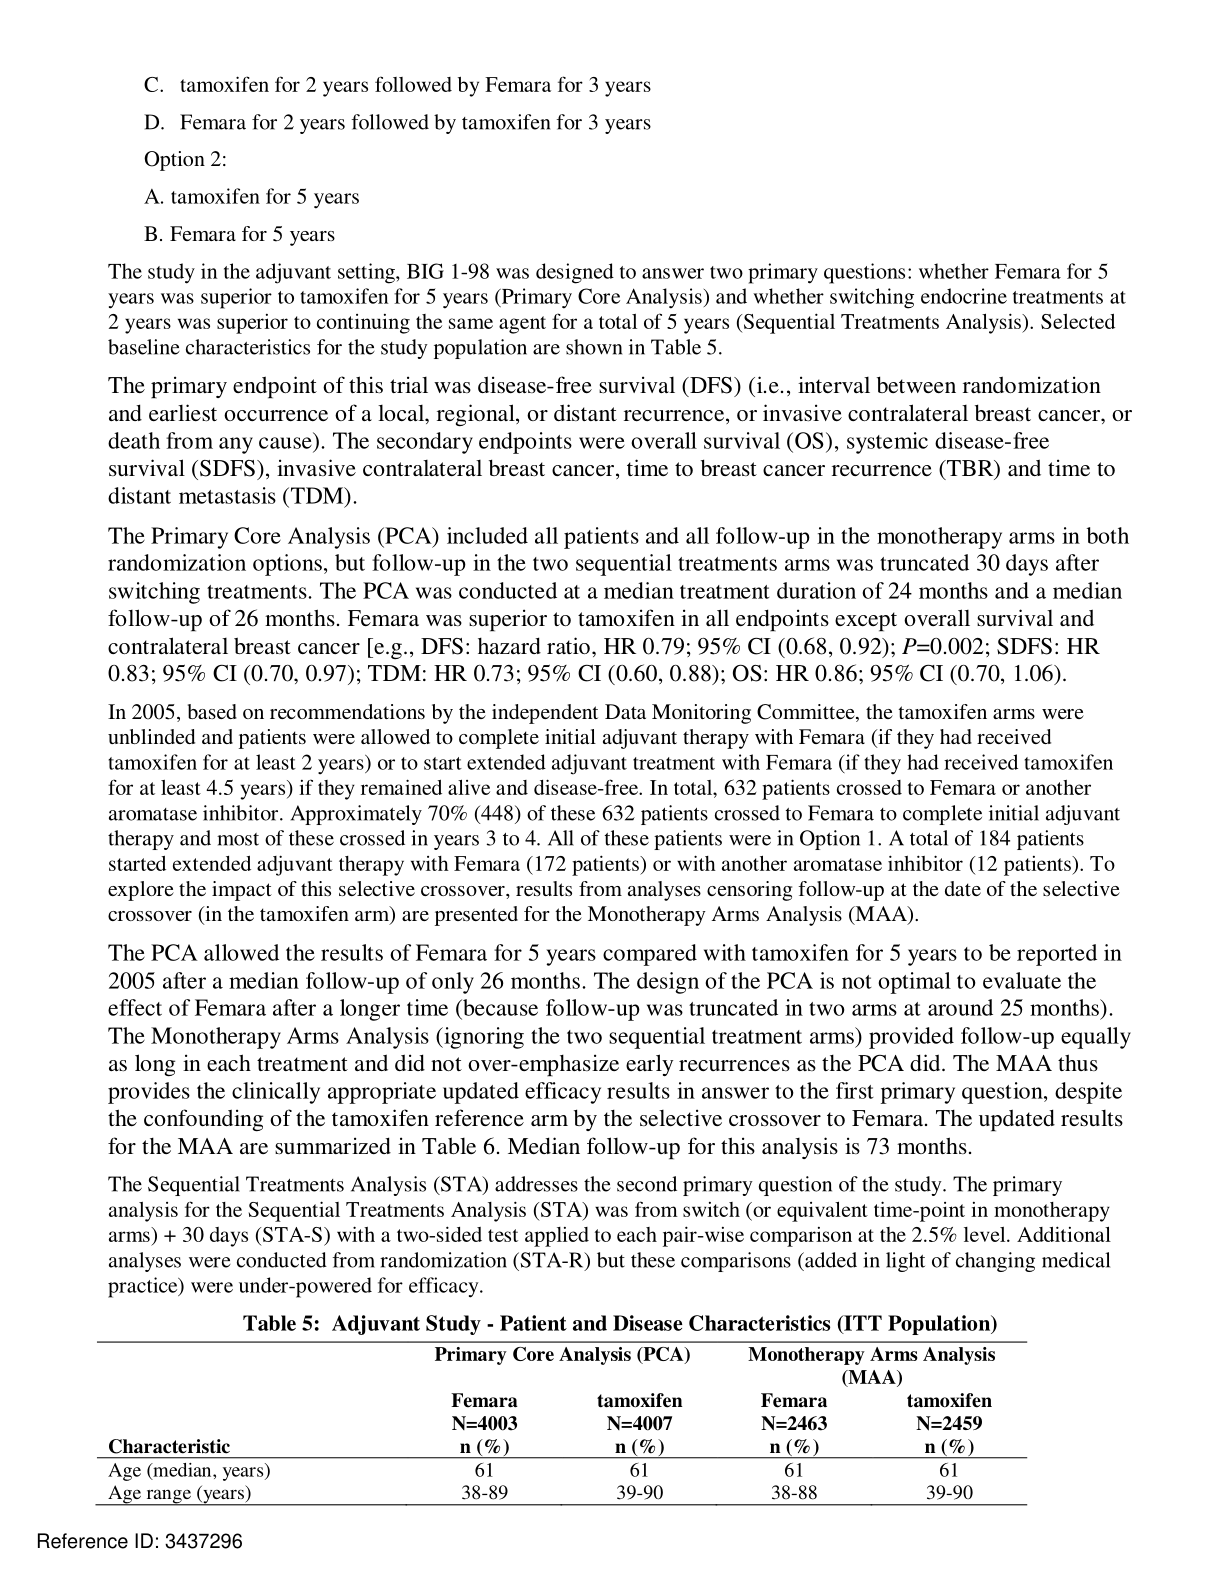

In [126]:
image

In [133]:
image.size

(1224, 1584)

In [135]:
width, height = image.size
print(f'Width: {width} pixels, Height: {height} pixels')


Width: 1224 pixels, Height: 1584 pixels


In [136]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [129]:
inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]])

results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected table with confidence 1.0 at location [107.77, 1345.35, 992.21, 1504.46]


In [130]:

from PIL import ImageDraw

def visualize_bbox(image, box, color='blue', width=4):
  # width, height = image.size

  draw = ImageDraw.Draw(image)
  draw.rectangle(box, outline=color, width=width)
  # padded_image = add_padding(table_image, 20)

  return image
  # padded_image = add_padding(table_image, 2)
  # padded_image

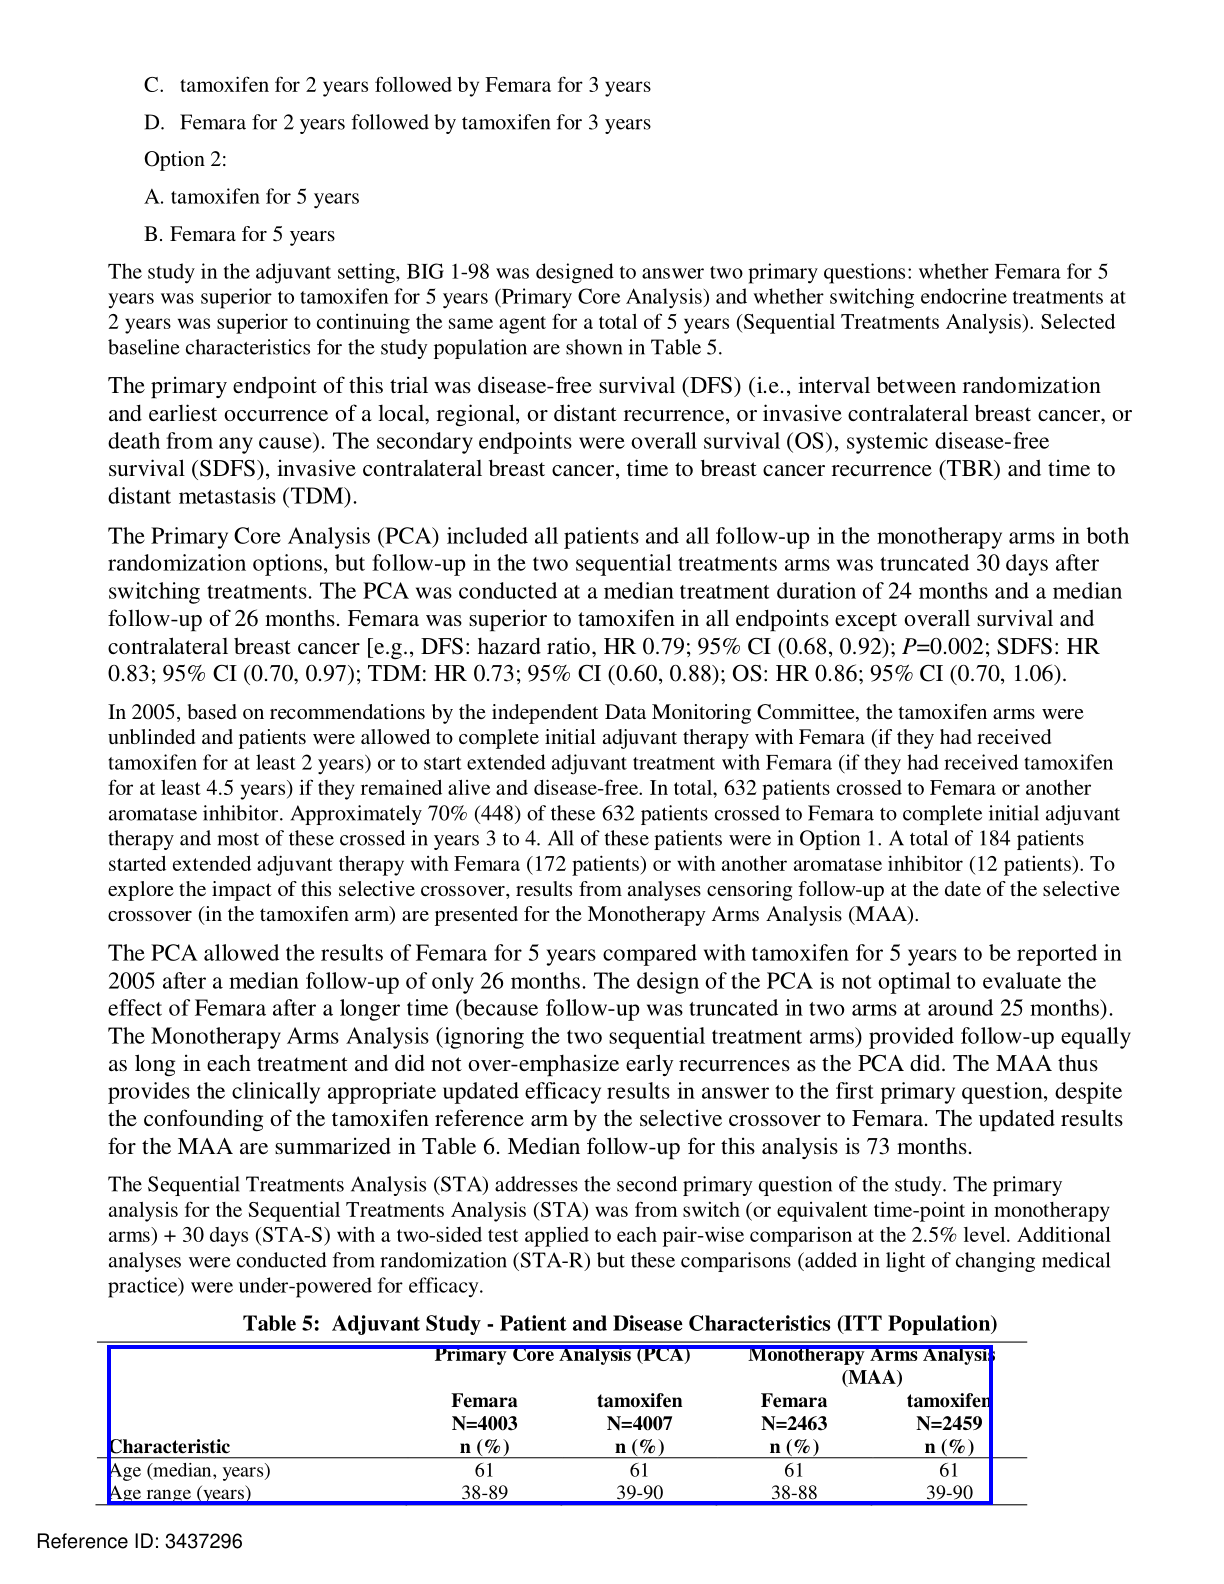

In [131]:
visualize_bbox(image, results["boxes"][0].tolist())

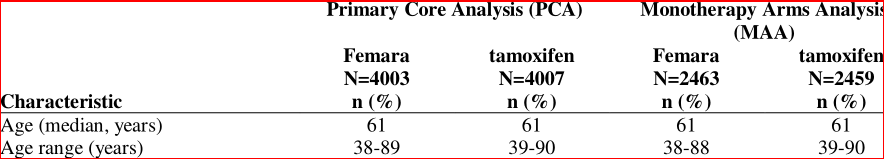

In [ ]:
table_image = image.crop(box)

table_image

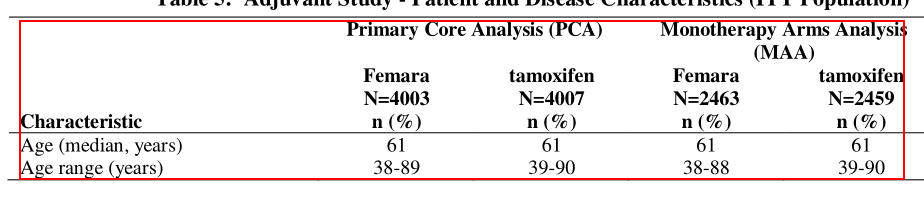

In [ ]:
# Let's add some padding to the box so that we don't crop too close to the table.

padding = 20

box = [box[0] - padding, box[1] - padding, box[2] + padding, box[3] + padding]

table_image = image.crop(box)

table_image

In [ ]:
import matplotlib.pyplot as plt
from transformers import DetrFeatureExtractor, DetrForObjectDetection

In [ ]:
COLORS = [
    [0.000, 0.447, 0.741],
    [0.850, 0.325, 0.098],
    [0.929, 0.694, 0.125],
    [0.494, 0.184, 0.556],
    [0.466, 0.674, 0.188],
    [0.301, 0.745, 0.933],
]

def plot_simple_box(table_img, bboxes, file_name="output.png"):
    plt.figure(figsize=(16, 10))
    plt.imshow(table_img)
    ax = plt.gca()
    colors = COLORS * 100
    for bbox, c in zip(bboxes, colors):
        ax.add_patch(
            plt.Rectangle(
                (bbox[0], bbox[1]),
                bbox[2] - bbox[0],
                bbox[3] - bbox[1],
                fill=False,
                color=c,
                linewidth=0.5,
            )
        )
    plt.axis("off")
    plt.show()
    plt.savefig(f"{file_name}.png", bbox_inches="tight")




In [ ]:
model_structure = TableTransformerForObjectDetection.from_pretrained(
    "microsoft/table-transformer-structure-recognition")


def get_row_col_bounds(table, ts_thresh=0.7, plot=False):
    feature_extractor = DetrFeatureExtractor()
    table_encoding = feature_extractor(table, return_tensors="pt")

    # predict table structure
    with torch.no_grad():
        outputs = model_structure(**table_encoding)

    # visualize table structure
    target_sizes = [table.size[::-1]]
    table_struct_results = feature_extractor.post_process_object_detection(
        outputs, threshold=ts_thresh, target_sizes=target_sizes
    )[0]


    row_boxes = table_struct_results["boxes"][
        table_struct_results["labels"] == model_structure.config.label2id["table row"]
    ]

    row_scores = table_struct_results["scores"][
        table_struct_results["labels"] == model_structure.config.label2id["table row"]
    ]

    col_boxes = table_struct_results["boxes"][
        table_struct_results["labels"]
        == model_structure.config.label2id["table column"]
    ]

    col_scores = table_struct_results["scores"][
        table_struct_results["labels"]
        == model_structure.config.label2id["table column"]
    ]

    table_header_box = table_struct_results["boxes"][
        table_struct_results["labels"]
        == model_structure.config.label2id["table column header"]
    ]
    table_header_score = table_struct_results["scores"][
        table_struct_results["labels"]
        == model_structure.config.label2id["table column header"]
    ]

    print(f"Num rows initially detected: {len(row_boxes)}")
    print(f"Num cols initially detected: {len(col_boxes)}")
    print(f"Num table header detected: {len(table_header_box)}")


    return (
        row_boxes,
        row_scores,
        col_boxes,
        col_scores,
        table_header_box,
        table_header_score,
    )

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
table_structure_outs = get_row_col_bounds(table_image)

Num rows initially detected: 2
Num cols initially detected: 5
Num table header detected: 1


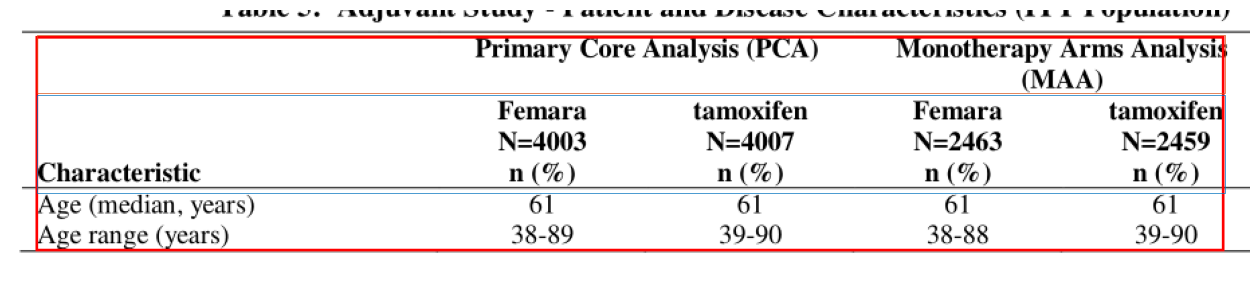

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_simple_box(table_image, table_structure_outs[0])

In [ ]:
def sort_row_col_boxes(row_boxes, col_boxes):
    row_boxes = row_boxes.tolist()
    col_boxes = col_boxes.tolist()
    row_boxes.sort(key=lambda x: x[1]) #[top_x, top_y, bottom_x, bottom_y]
    col_boxes.sort(key=lambda x: x[0])
    return row_boxes, col_boxes

In [ ]:
def get_cells_by_intersecting_rows_and_cols(row_boxes, col_boxes, padding=(0, 0)):
    cells = []
    for row_box in row_boxes:
        for col_box in col_boxes:
            cell_left_upper_x = col_box[0]
            cell_left_upper_y = row_box[1]
            cell_right_lower_x = col_box[2]
            cell_right_lower_y = row_box[3]
            cells.append(
                [
                    cell_left_upper_x,
                    cell_left_upper_y,
                    cell_right_lower_x,
                    cell_right_lower_y,
                ]
            )
    return cells


In [ ]:
sorted_rows, sorted_cols = sort_row_col_boxes(table_structure_outs[0], table_structure_outs[2])

In [ ]:
cells = get_cells_by_intersecting_rows_and_cols(sorted_rows, sorted_cols)

In [ ]:
cells[0]

[19.60186767578125, 18.24216079711914, 266.0231018066406, 61.57003402709961]

In [ ]:
padded_image.crop(cells[0])

NameError: name 'padded_image' is not defined

In [ ]:
df

In [ ]:
df.to_csv("table.csv", index=False)